# Lesson 3: Reading journals from food critics

In this lesson, you'll use AI to decide whether the contents of a file are about food and restaurants.

Text data like emails, journal entries, and social media posts often have no predefined structure. Additionally, each person writes in their own style: some use bullet points, while others prefer long paragraphs. For this reason, text data is known as **unstructured data**. 

Let's start by loading some helper functions to use in the notebook:

In [1]:
from helper_functions import get_llm_response, print_llm_response

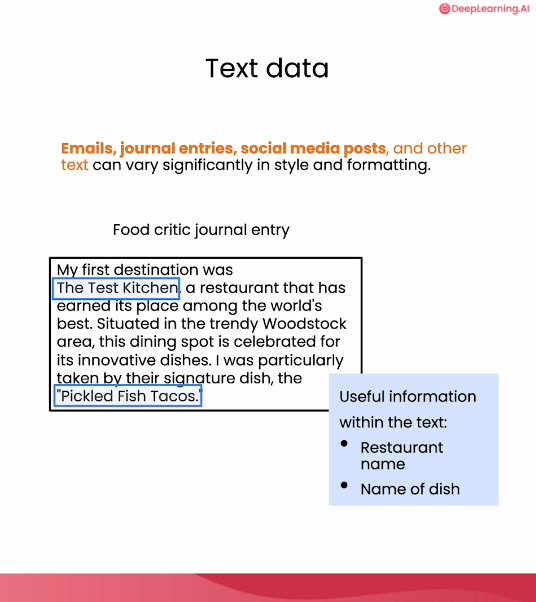

## Working with text data

You'll take look at journal entries in the working directory. The journals are stored as plain text files with extension `.txt'.

Start by opening and reading the Cape Town journal:

In [2]:
f = open("cape_town.txt", "r")
journal_cape_town = f.read()
f.close()

Print the contents of the journal:

In [3]:
print(journal_cape_town)

My first destination was The Test Kitchen, a restaurant that has earned its place among the world's best. Situated in the trendy Woodstock area, this dining spot is celebrated for its innovative dishes. I was particularly taken by their signature dish, the "Pickled Fish Tacos." The tangy, flavorful fish wrapped in a soft taco, paired with a zesty salsa, was a delightful start to my culinary adventure. The industrial-chic ambiance added a modern edge to the dining experience.

Next, I made my way to La Colombe, perched on the slopes of Constantia. Known for its refined and artistic approach to cuisine, La Colombe's "Tuna La Colombe" is a must-try. This dish features perfectly seared tuna, complemented by a delicate ponzu dressing and bursts of citrus. The presentation was as exquisite as the flavors, making it a memorable highlight of the day.

At the bustling V&A Waterfront, I visited Harbour House for some of the freshest seafood in town. The "Grilled Kingklip" was a revelation. The s

As you can see, the file is about restaurants and food.

Next, open the Tokyo journal entry file and read its contents:

In [4]:
f = open("tokyo.txt", "r")
journal_tokyo = f.read() 
f.close()

Print the contents of the journal:

In [5]:
print(journal_tokyo)

Tokyo's culinary landscape is nothing short of extraordinary. Each spot offers a unique taste of the city's diverse food culture. Here's a quick guide to some must-try places and dishes.

    Sukiyabashi Jiro
        Location: Ginza
        Dish: Omakase sushi
        Highlight: Impeccably crafted sushi made by the legendary Jiro Ono. Each piece is a masterclass in balance and flavor.

    Ichiran Ramen
        Location: Shibuya
        Dish: Tonkotsu ramen
        Highlight: A personal ramen booth for focused, uninterrupted enjoyment. Rich, creamy broth with perfectly cooked noodles.

    Tsukiji Outer Market
        Location: Tsukiji
        Dish: Fresh sashimi and street food
        Highlight: Vibrant market atmosphere. Indulge in ultra-fresh sashimi, grilled seafood, and other Japanese street food delights.

    Narisawa
        Location: Minato
        Dish: Innovative tasting menu
        Highlight: A fusion of French and Japanese techniques. Creative dishes with an emphasis on 

This entry is also about restaurants and food - but notice how different the format of the journal is from the Cape Town example!

## Determining if text files are relevant using LLMs

In this section, you'll write a prompt that instructs an LLM to determine whether a file content is about food and restaurants or some other topic. 

Define the prompt and include the Tokyo journal entry as the input data to check:

In [6]:
prompt = f"""Respond with "Relevant" or "Not relevant": 
the journal describes restaurants and their specialties. 

Journal:
{journal_tokyo}"""

Print the LLM response to see if the file is relevant for our purpose or not:

In [7]:
print_llm_response(prompt)

Relevant


## Checking all files using a `for` loop

Using Python and an LLM together allows you to quickly iterate over multiple files and check the relevance of the content for your tasks.

Start by creating a list of all the files you want to check:

In [8]:
# List of the journal files
files = ["cape_town.txt", "madrid.txt", "rio_de_janeiro.txt", "sydney.txt", "tokyo.txt"]

Next, use a `for` loop to open each file and have an LLM check if the content from that file is relevant to food and restaurants.
* *If you need a refresher on `for` loops, please revisit Course 2!*

In [9]:
for file in files:
    # Read journal file for the city
    f = open(file, "r")
    journal = f.read()
    f.close()

    # Create prompt
    prompt = f"""Respond with "Relevant" or "Not relevant": 
    the journal describes restaurants and their specialties. 

    Journal:
    {journal}"""

    # Use LLM to determine if the journal entry is useful
    print(f"{file} -> {get_llm_response(prompt)}")

cape_town.txt -> Relevant
madrid.txt -> Not relevant
rio_de_janeiro.txt -> Relevant
sydney.txt -> Relevant
tokyo.txt -> Relevant


It seems that the Madrid journal entry is not relevant. Let's print its contents to see why the LLM flagged it as "not relevant":

In [10]:
# Here you can check the content from any journal entry
f = open("madrid.txt", "r") 
print(f.read()) 
f.close()

Madrid, as Spain's capital and largest city, is a key player in the nation's economy. Historically centered around its administrative functions, Madrid has evolved into a major financial hub, hosting the Madrid Stock Exchange and the headquarters of numerous national and international companies.

The service sector, especially tourism, is vital to Madrid's economy. Millions of tourists visit annually, attracted by the city's cultural landmarks, museums, and vibrant nightlife. Additionally, trade fairs and conferences at venues like IFEMA (Feria de Madrid) bring significant business traffic.

Innovation and technology are also growing sectors in Madrid. The city boasts a thriving startup ecosystem and hosts many tech companies, supported by a highly educated workforce from its universities and research institutions. This has spurred growth in IT, biotechnology, and renewable energy.

Madrid's well-developed transportation network, including a comprehensive metro system, high-speed rail,

The Madrid journal entry doesn't contain information about restaurants to try. Instead, it is a description of the economy of the city.

<p style="background-color:#F5C780; padding:15px"> 🤖 <b>Use the Chatbot</b>:
    <br><br>
    I am using AI to determine whether different texts are "relevant" or "not relevant" using an LLM. Does this task have a specific name in AI?
</p>

## Extra practice

Experiment with different prompts to check whether files are of interest to you or not. Below is the example suggested in the video - try running it first. Then, try each exercise.

### Exercise 1

Change the prompt to classify the text for different topics, for example "mentions a dessert" or "describes the restaurant design."

In [11]:
files = ["cape_town.txt", "madrid.txt", "rio_de_janeiro.txt", 
         "sydney.txt", "tokyo.txt"]

for file in files:
    # Read journal file for the city
    f = open(file, "r")
    journal = f.read()
    f.close()

    # TRY CHANGING THIS PROMPT TO ASK DIFFERENT QUESTIONS
    prompt = f"""Respond with "Yes" or "No": 
    the journal mentions a dessert. 

    Journal:
    {journal}"""

    # Use LLM to determine if the journal entry is useful
    print(f"{file} -> {get_llm_response(prompt)}")

cape_town.txt -> No
madrid.txt -> No
rio_de_janeiro.txt -> Yes
sydney.txt -> No
tokyo.txt -> No


In [12]:
files = ["cape_town.txt", "madrid.txt", "rio_de_janeiro.txt", 
         "sydney.txt", "tokyo.txt"]

for file in files:
    # Read journal file for the city
    f = open(file, "r")
    journal = f.read()
    f.close()

    # TRY CHANGING THIS PROMPT TO ASK DIFFERENT QUESTIONS
    prompt = f"""Respond with "Yes" or "No": 
    the journal describes the restaurant design. 

    Journal:
    {journal}"""

    # Use LLM to determine if the journal entry is useful
    print(f"{file} -> {get_llm_response(prompt)}")

cape_town.txt -> Yes
madrid.txt -> No
rio_de_janeiro.txt -> Yes
sydney.txt -> No
tokyo.txt -> No


### Exercise 2

Using the same code below, change the prompt to classify into more than two categories.

**Example:**
- mentions a **vegetarian** dish
- mentions a **vegan** dish
- mentions both
- mentions neither

In [14]:
files = ["cape_town.txt", "madrid.txt", "rio_de_janeiro.txt", 
         "sydney.txt", "tokyo.txt"]

for file in files:
    # Read journal file for the city
    f = open(file, "r")
    journal = f.read()
    f.close()

    # TRY CHANGING THIS PROMPT TO ASK DIFFERENT QUESTIONS
    prompt = f"""Respond with "Yes" or "No": 
    the journal mentions a vegetarian or a vegan dish. 

    Journal:
    {journal}"""

    # Use LLM to determine if the journal entry is useful
    print(f"{file} -> {get_llm_response(prompt)}")

cape_town.txt -> No
madrid.txt -> No
rio_de_janeiro.txt -> No
sydney.txt -> No
tokyo.txt -> No
